# Outras tarefas de inteligência artificial e modelos pré-treinados

- https://huggingface.co/

### Preparação do ambiente

In [ ]:
!pip install diffusers
!pip install spacy-transformers
!pip install transformers
!pip install --upgrade diffusers[torch]

O que são difusers?

- https://medium.com/@PhysicistMarianna/diffusion-models-clearly-explained-1fbd5afa36b3

In [ ]:
import transformers

## Stable Diffusion

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
model_id = "prompthero/openjourney"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
prompt = "elf warrior in a rain forest 4k hyperealistic mdjrny-v4 style"
image = pipe(prompt, num_inference_steps=80).images[0]
image.save("./elf_warrior.png")

  0%|          | 0/80 [00:00<?, ?it/s]

## Pix 2 Pix

- https://stable-diffusion-art.com/instruct-pix2pix/

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

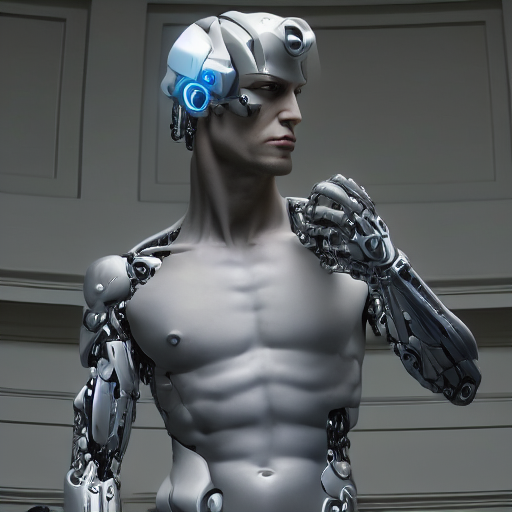

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
# pipe.to("cuda")
pipe.enable_model_cpu_offload()
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)


def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image

In [ ]:
url = "https://images.unsplash.com/photo-1488426862026-3ee34a7d66df?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=387&q=80"
url = "https://images.unsplash.com/photo-1590583120731-23c7e3c98322?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=687&q=80"
image = download_image(url)
prompt = "wearing a black jacket"
prompt = "change to royo style"
images = pipe(prompt, image=image, num_inference_steps=12, image_guidance_scale=1).images
images[0].save("./gryphon.png")

  0%|          | 0/12 [00:00<?, ?it/s]

# Imagem para texto

- https://huggingface.co/Salesforce/blip-image-captioning-large

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


In [ ]:
img_url = 'https://images.unsplash.com/photo-1690651166371-6d5a5412db4b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1170&q=80'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a photography of a little girl walking down a street with a bunch of people
there is a little girl walking down the street with a backpack


## Texto para vídeo

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = "Pope riding a bicycle"
video_frames = pipe(prompt, num_inference_steps=25).frames
video_path = export_to_video(video_frames)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
video_path

'/tmp/tmpp_dw1fec.mp4'

# Classificação de imagens com Resnet (já vimos)

In [ ]:
from transformers import AutoImageProcessor, ResNetModel, ResNetForImageClassification
import torch
from PIL import Image
import requests
# image = dataset["test"]["image"][0]

img_url = 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1143&q=80'
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Egyptian cat


# Spaces via api

- https://huggingface.co/Linaqruf/animagine-xl

In [ ]:
# !pip install gradio_client

## Upando seus modelos com Gradio

- https://www.gradio.app/